1. When you send a message on WhatsApp, stream a video, or deploy an API, countless networking layers work behind the scenes to make that communication reliable.

2. Data doesn't magically jump from one computer to another; it undergoes a meticulous journey, transformed and routed at each step.

## 1. OSI

**The OSI (Open Systems Interconnection) Model is a conceptual framework that beautifully illustrates this journey.**

Developed by the International Organization for Standardization (ISO), it describes how data moves from an application on one computer, through a network, to an application on another computer.

Its primary purpose is to:

1. **Standardize Communication**: Provide a common language and framework for network designers and developers.

2. **Ensure Interoperability**: Allow different hardware and software from various vendors to communicate seamlessly.

3. **Promote Modular Design**: Break down complex networking tasks into smaller, more manageable layers, making development and troubleshooting easier.

| Layer | Name          | Primary Function                                      | Example Protocols / Concepts                 |
|--------|---------------|-------------------------------------------------------|----------------------------------------------|
| 7      | Application   | User-facing services, application interaction         | HTTP, DNS, SMTP, FTP, SSH, gRPC              |
| 6      | Presentation  | Data formatting, encryption, compression              | SSL/TLS, MIME, JSON, XML, Protobuf           |
| 5      | Session       | Manage communication sessions                        | RPC, NetBIOS, Sockets (conceptually)         |
| 4      | Transport     | End-to-end reliable data delivery                     | TCP, UDP                                     |
| 3      | Network       | Logical addressing & routing across networks          | IP, ICMP, OSPF, BGP                          |
| 2      | Data Link     | Physical addressing, error detection for local link   | Ethernet, Wi-Fi (MAC addresses), ARP         |
| 1      | Physical      | Transmit raw bits over physical media                 | Cables (Ethernet, Fiber), Radio Waves        |


1. A crucial concept is **encapsulation** : As data moves down the stack at the sender, each layer adds its own "header" (and sometimes a trailer) containing control information. 

2. When data moves up the stack at the receiver, each layer strips off its corresponding header.

In [1]:
from IPython.display import Image, display

**Layer 1 – Physical Layer**

1. The Physical Layer is responsible for the **actual transmission of raw bits (0s and 1s) over the physical communication medium.** 
2. It defines the electrical, mechanical, procedural, and functional specifications for activating, maintaining, and deactivating physical links.
3. Examples: Ethernet cables (Cat 5e, Cat 6), fiber optics, Wi-Fi radio frequencies, DSL, modems, hubs, repeaters.


**Layer 2 – Data Link Layer**

1. The Data Link Layer ensures reliable transmission of data between directly connected nodes (i.e., devices on the same local network segment). 
2. It handles framing (dividing data into manageable units), **physical addressing (using MAC addresses), and error detection/correction for the local link**.
3. Examples: Ethernet, Wi-Fi (802.11 standards), ARP (Address Resolution Protocol), switches.


**Layer 3 – Network Layer**

1. The Network Layer is responsible for logical addressing (IP addresses) and routing data packets across potentially multiple interconnected networks. 
2.**It determines the best path for data to travel from source to destination.**
3. Protocols: IP (Internet Protocol), ICMP (Internet Control Message Protocol), OSPF (Open Shortest Path First), BGP (Border Gateway Protocol), routers.



**Layer 4 – Transport Layer**

1. **The Transport Layer provides end-to-end communication between processes** (applications) on different hosts. 
2. It **handles segmentation of data, multiplexing** (sending data from multiple applications over one network connection), and often reliable data transfer.
3. Protocols: TCP (Transmission Control Protocol) and UDP (User Datagram Protocol).



**Layer 5 – Session Layer**

1. The Session Layer is responsible for establishing, managing, and terminating communication sessions between applications. 
2. It handles things like **authentication, authorization**, and keeping track of which application sent which data.
3. Examples: While less distinct in modern TCP/IP implementations, concepts like RPC (Remote Procedure Call) sessions or WebSocket connections align with this layer's purpose.



**Layer 6 – Presentation Layer**

1. The Presentation Layer ensures that **data is in a usable format** for the Application Layer. 
2. It handles **data translation, encryption/decryption, compression/decompression**, and serialization/deserialization.
3. Examples: SSL/TLS (encryption), JSON, XML, Protocol Buffers (serialization), MIME (data format specification).


**Layer 7 – Application Layer**

1. The Application Layer is the closest to the end-user. 
2. It defines how applications interact with the network and provides user-facing services. This is where your actual software logic often resides.
3. Examples: HTTP, HTTPS, DNS, SMTP, FTP, SSH, Telnet, gRPC, WebSocket.

## 2. Encapsulation and Decapsulation in Action

**Let's trace a simple HTTP GET request from your browser to a web server:**

1. **Application Layer (L7)**: Your browser creates an HTTP GET request (GET /index.html HTTP/1.1).
2. **Presentation Layer (L6)**: The data is prepared, possibly compressed, and then encrypted by TLS. The raw HTTP request becomes encrypted data.
3. **Session Layer (L5)**: A TLS session is managed.
4. **Transport Layer (L4)**: The encrypted data is segmented (if too large) and a TCP header is added, including source and destination port numbers (e.g., SRC=50000, DEST=443). This unit is now a TCP segment.
5. **Network Layer (L3)**: An IP header is added, containing the source IP address of your computer and the destination IP address of the web server. This unit is now an IP packet.
6. **Data Link Layer (L2)**: An Ethernet header and trailer are added, containing the source MAC address of your network card and the destination MAC address of your router (for the first hop). This unit is now an Ethernet frame.
7. **Physical Layer (L1)**: The frame is converted into raw electrical signals or light pulses and sent over the physical medium (e.g., Wi-Fi radio waves, Ethernet cable).

**At the web server, the process reverses:**

1. **Physical Layer (L1)**: Electrical signals are received and converted back into an Ethernet frame.
2. **Data Link Layer (L2)**: The Ethernet header/trailer is removed, MAC addresses are checked. The IP packet is extracted.
3. **Network Layer (L3)**: The IP header is removed, and the destination IP is checked. The TCP segment is extracted.
4. **Transport Layer (L4)**: The TCP header is removed, destination port (443) is checked, and segments are reassembled. The encrypted data is passed up.
5. **Session Layer (L5)**: The TLS session is managed.
6. **Presentation Layer (L6)**: The data is decrypted by TLS and decompressed.
7. **Application Layer (L7)**: The original HTTP GET request is delivered to the web server application, which then processes it.

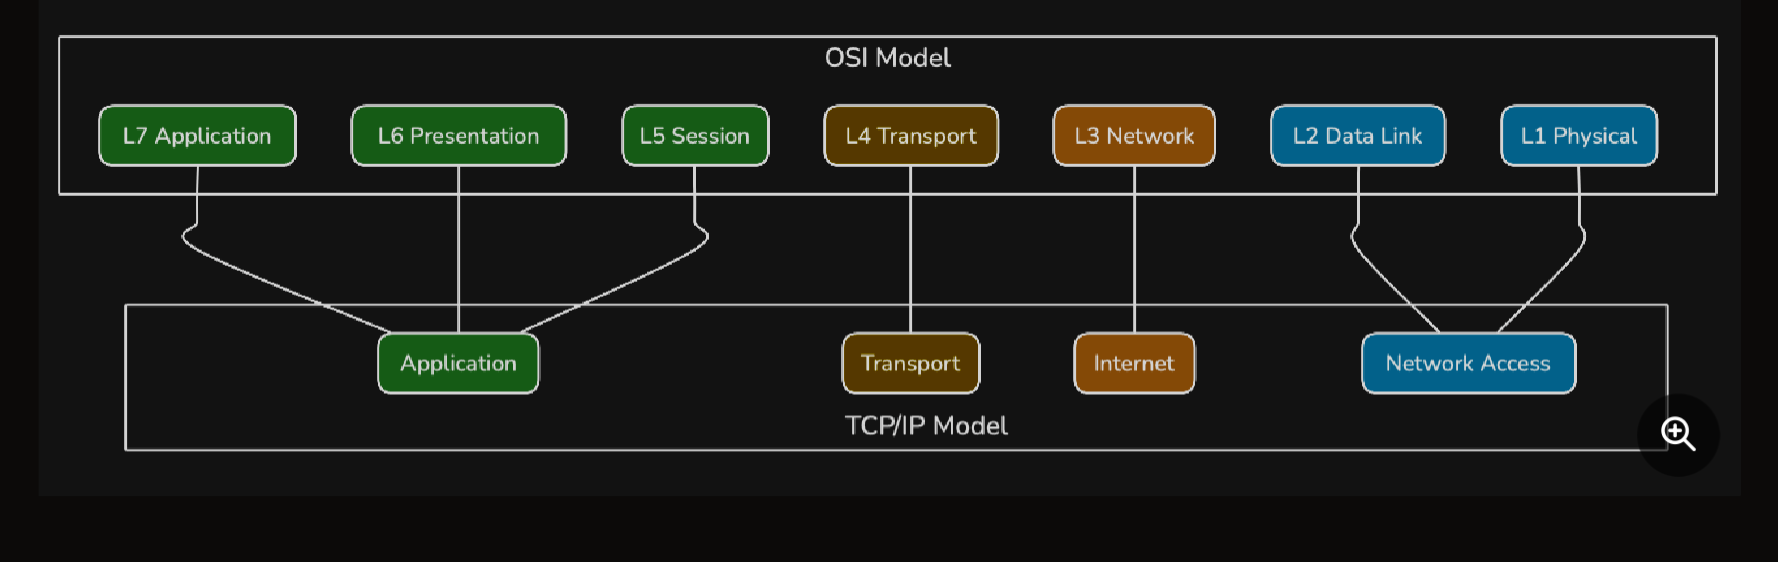

In [3]:
display(Image(filename='Utils/1.png'))

## 3. OSI vs TCP/IP Model

1. While the OSI model is a powerful theoretical tool, the TCP/IP model is the one that's actually implemented and used by the Internet. 
2. It's a more pragmatic, consolidated model, typically with four layers:

| TCP/IP Layer   | Corresponding OSI Layers | Focus                                  |
|----------------|---------------------------|----------------------------------------|
| Application    | L5, L6, L7                | User-facing apps, data formatting       |
| Transport      | L4                        | End-to-end communication (TCP/UDP)     |
| Internet       | L3                        | Logical addressing & routing (IP)      |
| Network Access | L1, L2                    | Physical media, local network links    |
